In [13]:
import pandas as pd
import talib
import matplotlib.pyplot as plt
import seaborn as sns
# import pynance as pn

In [14]:
df_pub=pd.read_csv('../data/interim/cleaned_analyst_ratings.csv')
df_stock=pd.read_csv('../data/raw/yfinance_data/AAPL_historical_data.csv')

In [15]:
df_stock['Date'] = pd.to_datetime(df_stock['Date'])

In [5]:
print(df_stock.head())
print(df_stock.info())
print(df_stock.describe(include='all'))

        Date      Open      High       Low     Close  Adj Close     Volume  \
0 1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1 1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2 1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3 1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4 1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          10998 non-null  datetime64[ns]
 1   Open          10998 non-null  float64       
 2   High          10998 non-null  float64       

In [6]:
print(df_stock.isnull().sum())
print(df_stock.duplicated().sum())

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
0


In [16]:
# Calculate Simple Moving Average (SMA)
df_stock['SMA_10'] = talib.SMA(df_stock['Close'], timeperiod=10)
df_stock['SMA_50'] = talib.SMA(df_stock['Close'], timeperiod=50)

# Calculate Exponential Moving Average (EMA)
df_stock['EMA_10'] = talib.EMA(df_stock['Close'], timeperiod=10)

In [17]:
# Calculate Relative Strength Index (RSI)
df_stock['RSI'] = talib.RSI(df_stock['Close'], timeperiod=14)

In [18]:
# Calculate MACD
df_stock['MACD'], df_stock['MACD_signal'], df_stock['MACD_hist'] = talib.MACD(
    df_stock['Close'], fastperiod=12, slowperiod=26, signalperiod=9
)

In [19]:
# Calculate Bollinger Bands
df_stock['upper_band'], df_stock['middle_band'], df_stock['lower_band'] = talib.BBANDS(
    df_stock['Close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0
)

In [21]:
import pynance as pn

# Load stock data using PyNance
ticker = 'AAPL'
stock = pn.data.get(ticker, start='2020-01-01', end='2024-01-01')

# Calculate daily returns
stock['daily_return'] = stock['Close'].pct_change()

# Calculate cumulative returns
stock['cumulative_return'] = (1 + stock['daily_return']).cumprod()

# Print financial metrics
print(stock.head())

ModuleNotFoundError: No module named 'distutils'

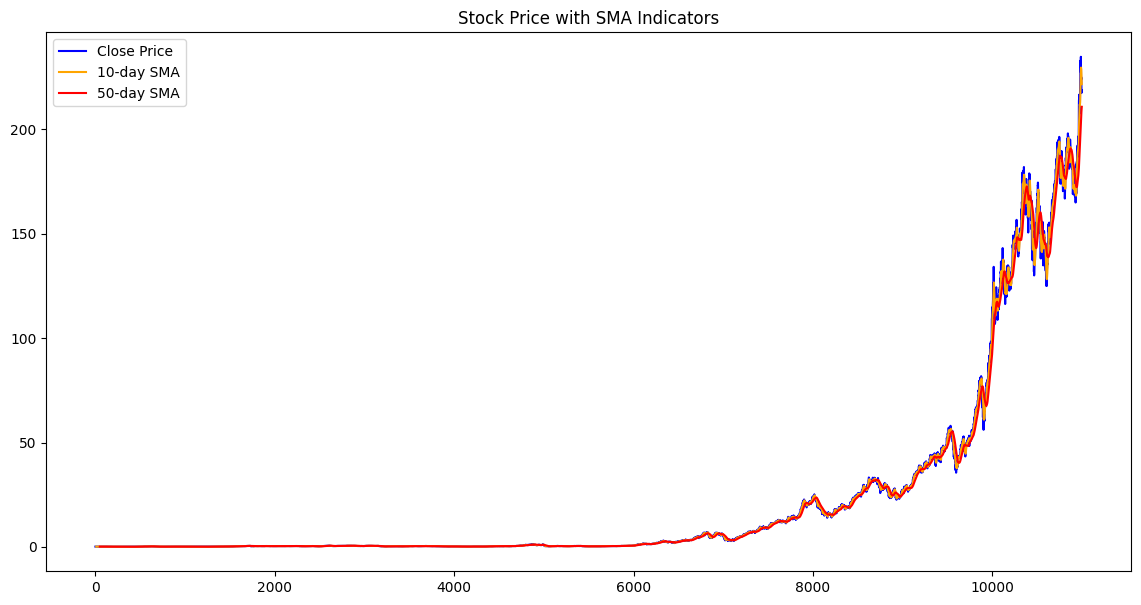

In [22]:
plt.figure(figsize=(14, 7))
plt.plot(df_stock.index, df_stock['Close'], label='Close Price', color='blue')
plt.plot(df_stock.index, df_stock['SMA_10'], label='10-day SMA', color='orange')
plt.plot(df_stock.index, df_stock['SMA_50'], label='50-day SMA', color='red')
plt.title('Stock Price with SMA Indicators')
plt.legend()
plt.show()

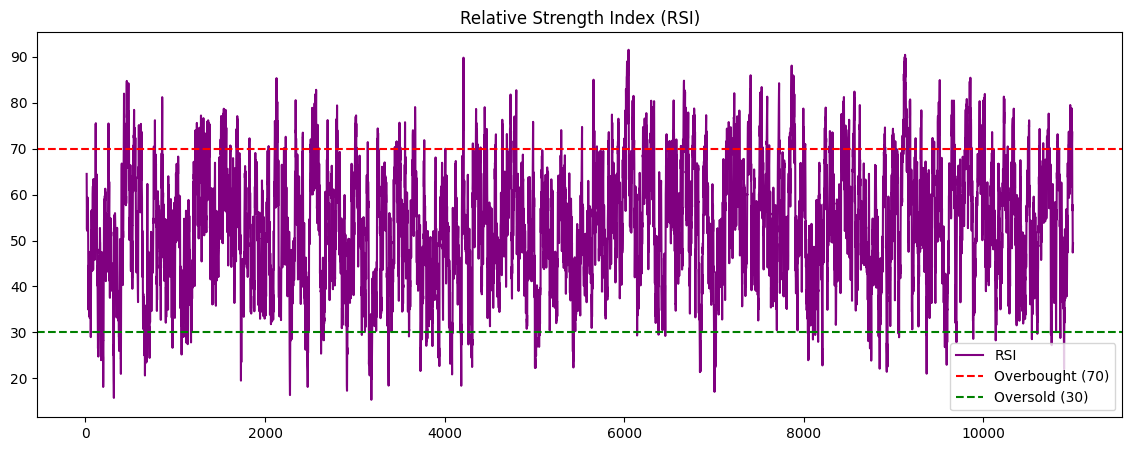

In [23]:
plt.figure(figsize=(14, 5))
plt.plot(df_stock.index, df_stock['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', color='red', label='Overbought (70)')
plt.axhline(30, linestyle='--', color='green', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.show()

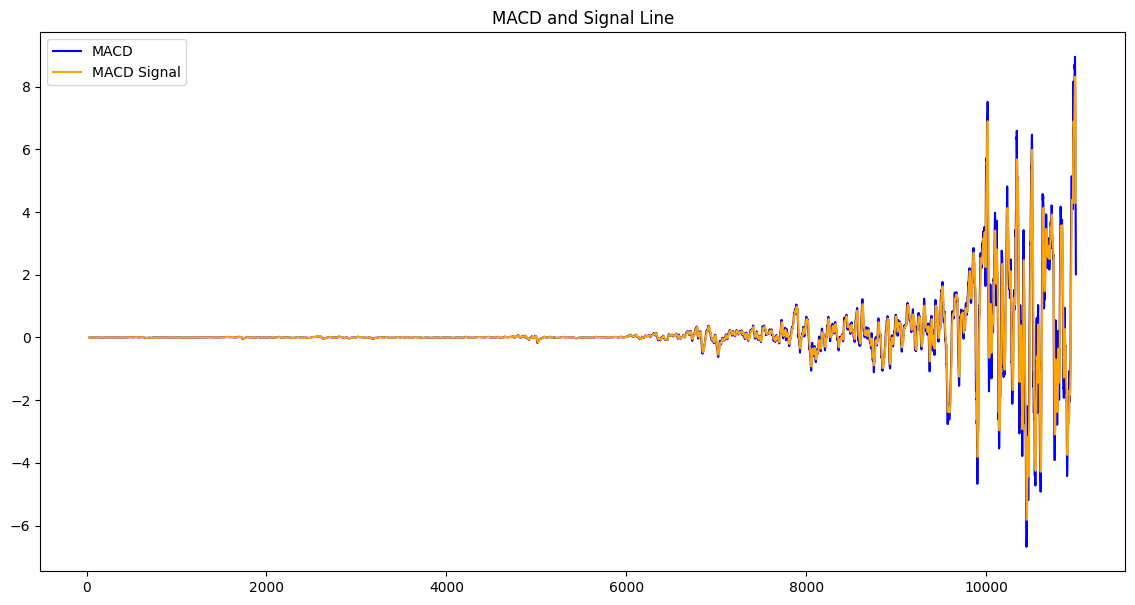

In [24]:
plt.figure(figsize=(14, 7))
plt.plot(df_stock.index, df_stock['MACD'], label='MACD', color='blue')
plt.plot(df_stock.index, df_stock['MACD_signal'], label='MACD Signal', color='orange')
plt.title('MACD and Signal Line')
plt.legend()
plt.show()

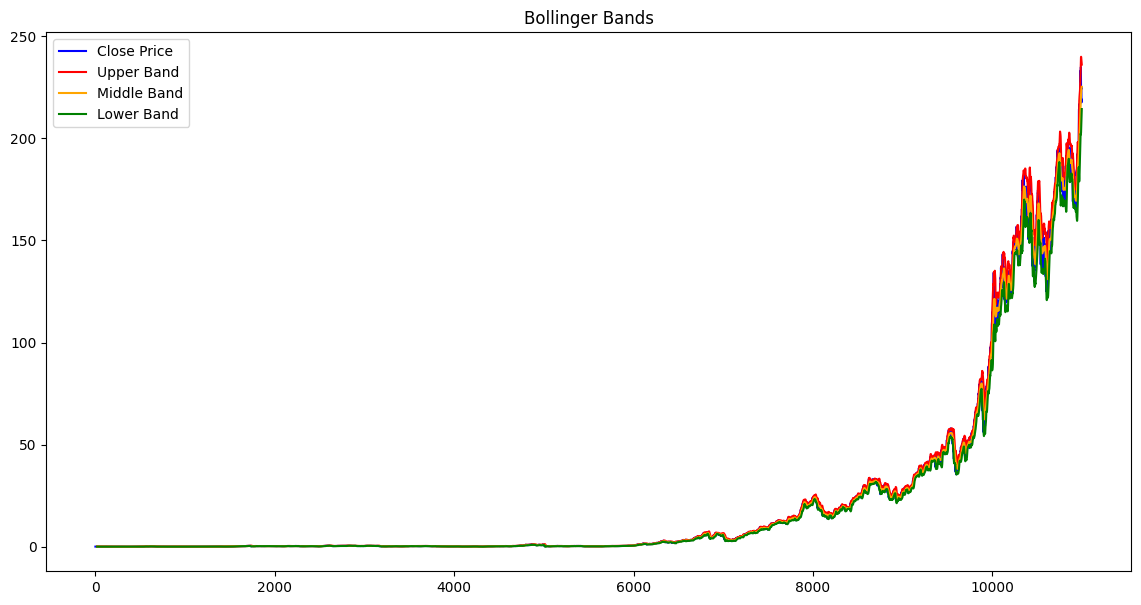

In [25]:
plt.figure(figsize=(14, 7))
plt.plot(df_stock.index, df_stock['Close'], label='Close Price', color='blue')
plt.plot(df_stock.index, df_stock['upper_band'], label='Upper Band', color='red')
plt.plot(df_stock.index, df_stock['middle_band'], label='Middle Band', color='orange')
plt.plot(df_stock.index, df_stock['lower_band'], label='Lower Band', color='green')
plt.title('Bollinger Bands')
plt.legend()
plt.show()

In [26]:
df_stock.to_csv('../data/processed/processed_stock_data_AAPL.csv')